## 1.import dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data= pd.read_table('./heart_disease_all.csv', sep=',', header=None, names=columns)

In [4]:
data.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [3]:
data.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


## 2.data exploration

In [11]:
names_descr = dict()
categorical_columns = ["sex", "cp","fbs", "restecg",
                       "exang","slope","ca","thal"]
for c in categorical_columns:
    print  data.groupby([c])["age"].count()


sex
0.0     96
1.0    201
Name: age, dtype: int64
cp
1.0     23
2.0     49
3.0     83
4.0    142
Name: age, dtype: int64
fbs
0.0    254
1.0     43
Name: age, dtype: int64
restecg
0.0    147
1.0      4
2.0    146
Name: age, dtype: int64
exang
0.0    200
1.0     97
Name: age, dtype: int64
slope
1.0    139
2.0    137
3.0     21
Name: age, dtype: int64
ca
0.0    174
1.0     65
2.0     38
3.0     20
Name: age, dtype: int64
thal
3.0    164
6.0     18
7.0    115
Name: age, dtype: int64


In [22]:
df0=data.copy()

(0.0, 1.0, 0.0, 1.0)

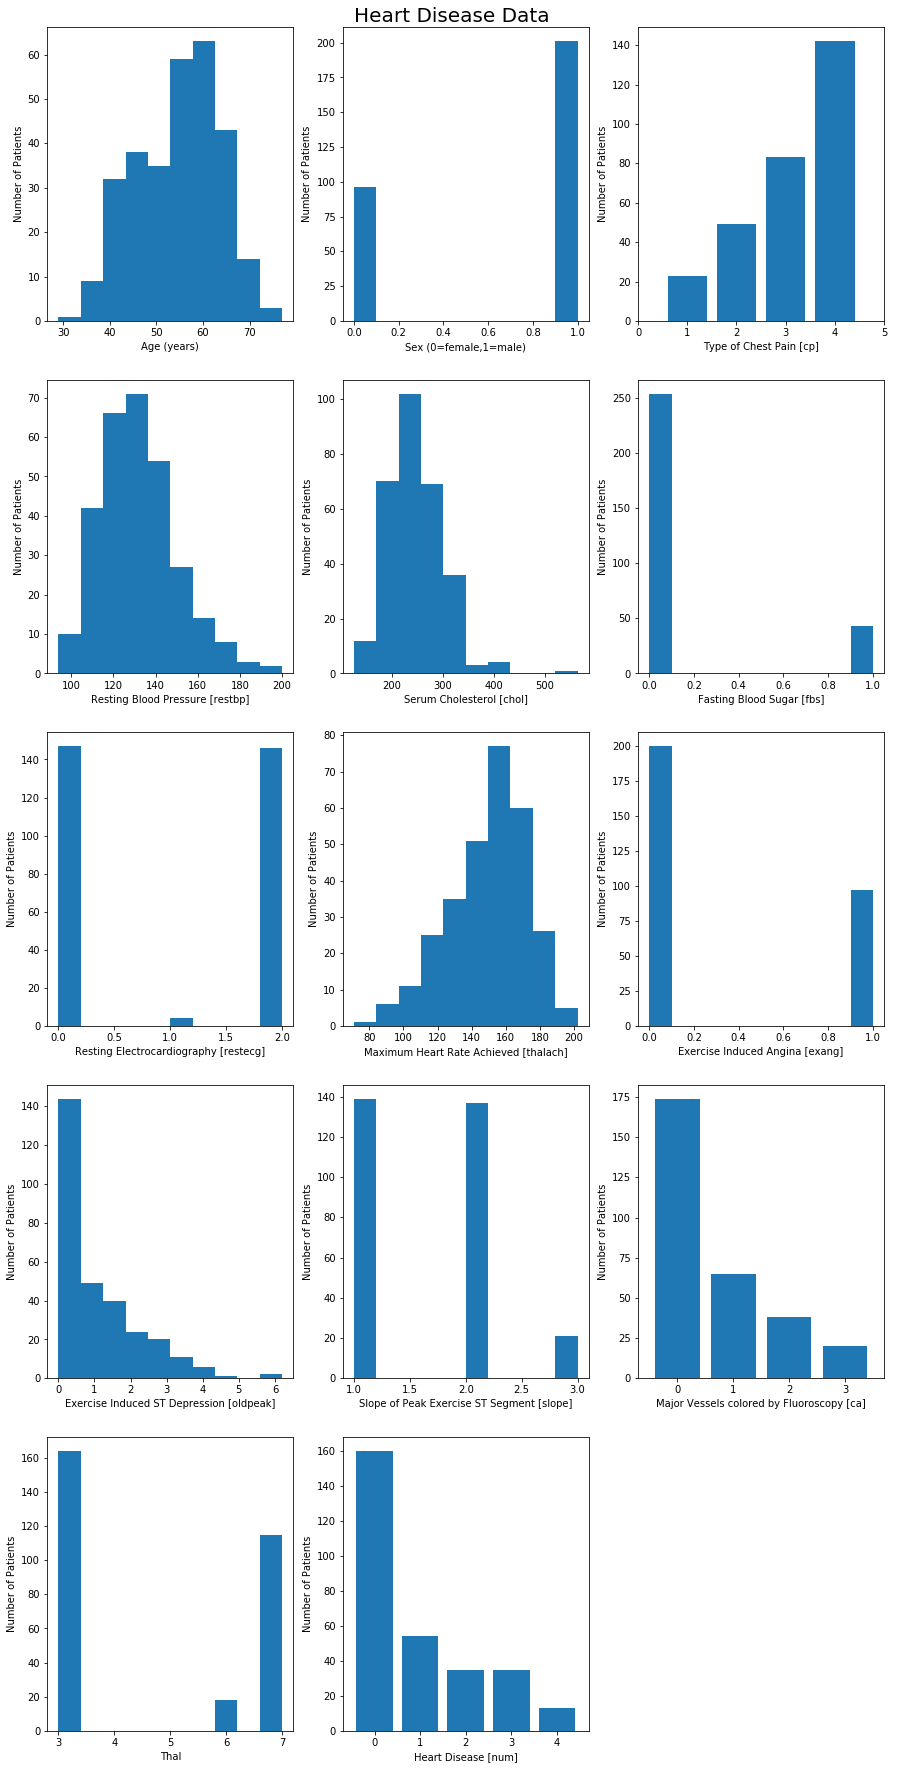

In [95]:
# Make some hist plots to check the data
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(15,28) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
axes[0,0].hist(df0.age)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylabel("Number of Patients")
axes[0,1].hist(df0.sex)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].set_ylabel("Number of Patients")
axes[0,2].hist(df0.cp,bins=4,range=(0.5,4.5),rwidth=0.80)
axes[0,2].set_xlim(0.0,5.0)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].set_ylabel("Number of Patients")
axes[1,0].hist(df0.restbp)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].set_ylabel("Number of Patients")
axes[1,1].hist(df0.chol)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].set_ylabel("Number of Patients")
axes[1,2].hist(df0.fbs)
axes[1,2].set_xlabel("Fasting Blood Sugar [fbs]")
axes[1,2].set_ylabel("Number of Patients")
axes[2,0].hist(df0.restecg)
axes[2,0].set_xlabel("Resting Electrocardiography [restecg]")
axes[2,0].set_ylabel("Number of Patients")
axes[2,1].hist(df0.thalach)
axes[2,1].set_xlabel("Maximum Heart Rate Achieved [thalach]")
axes[2,1].set_ylabel("Number of Patients")
axes[2,2].hist(df0.exang)
axes[2,2].set_xlabel("Exercise Induced Angina [exang]")
axes[2,2].set_ylabel("Number of Patients")
axes[3,0].hist(df0.oldpeak)
axes[3,0].set_xlabel("Exercise Induced ST Depression [oldpeak]")
axes[3,0].set_ylabel("Number of Patients")
axes[3,1].hist(df0.slope)
axes[3,1].set_xlabel("Slope of Peak Exercise ST Segment [slope]")
axes[3,1].set_ylabel("Number of Patients")
axes[3,2].hist(df0.ca,bins=4,range=(-0.5,3.5),rwidth=0.8)
axes[3,2].set_xlim(-0.7,3.7)
axes[3,2].set_xlabel("Major Vessels colored by Fluoroscopy [ca]")
axes[3,2].set_ylabel("Number of Patients")
axes[4,0].hist(df0.thal)
axes[4,0].set_xlabel("Thal")
axes[4,0].set_ylabel("Number of Patients")
axes[4,1].hist(df0.num,bins=5,range=(-0.5,4.5),rwidth=0.8)
axes[4,1].set_xlim(-0.7,4.7)
axes[4,1].set_xlabel("Heart Disease [num]")
axes[4,1].set_ylabel("Number of Patients")
axes[4,2].axis("off")

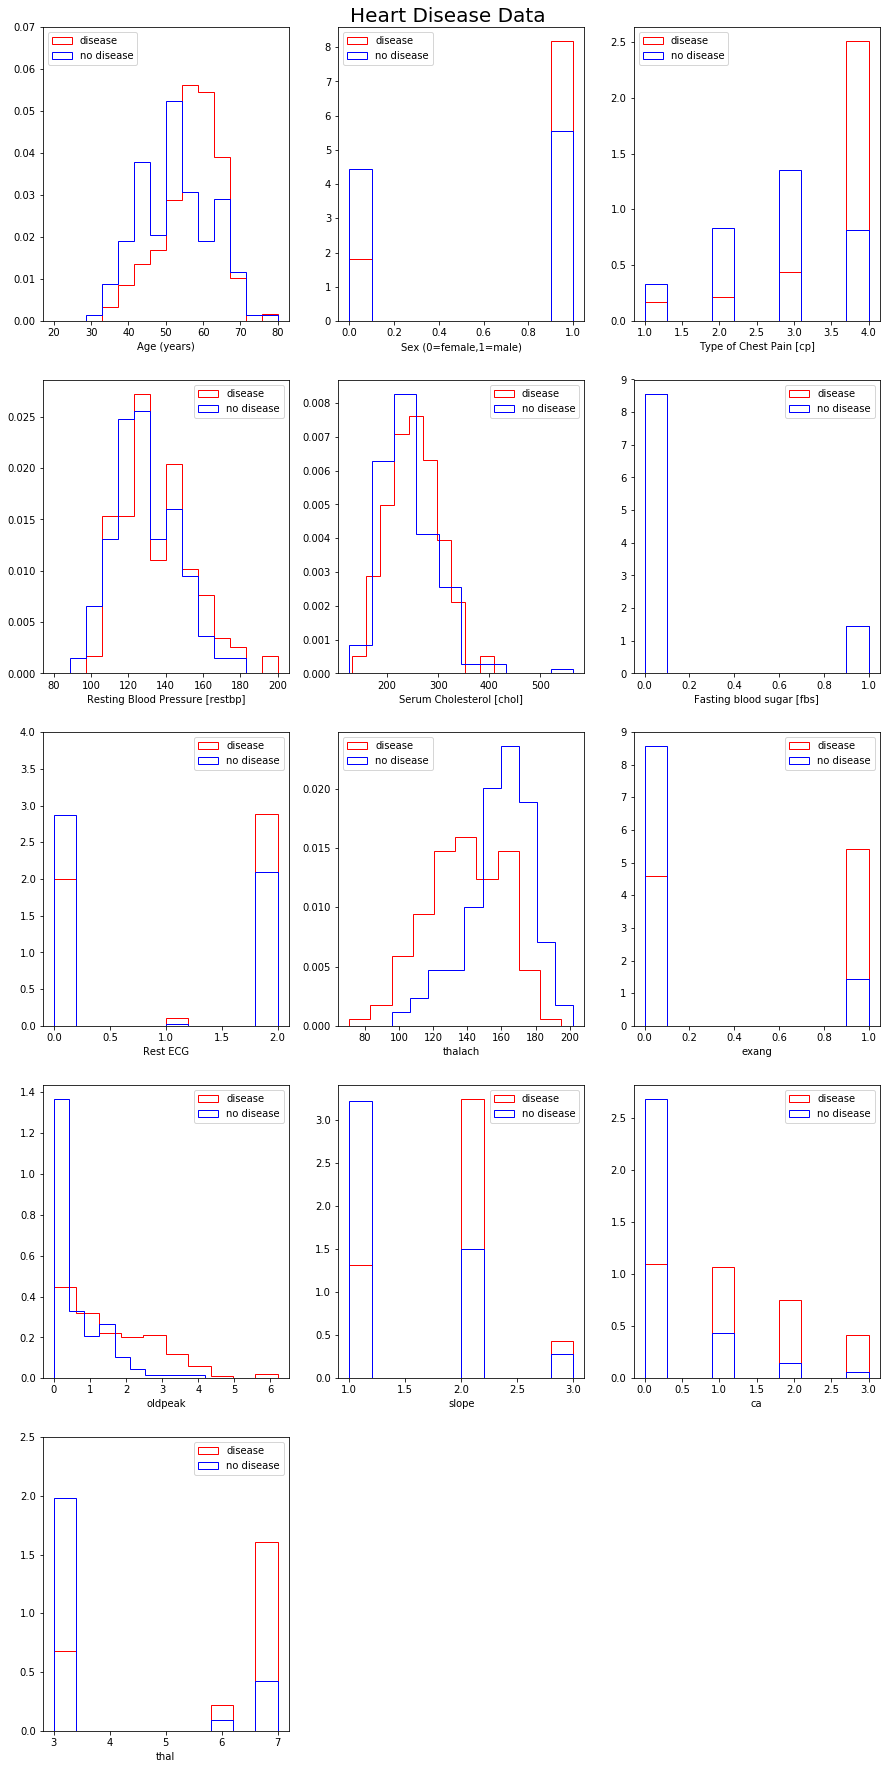

In [31]:
# Marginal feature distributions compared for disease and no-disease (likelihoods)
fig, axes = plt.subplots( nrows=5, ncols=3, figsize=(15,28) )
plt.subplots_adjust( wspace=0.20, hspace=0.20, top=0.97 )
plt.suptitle("Heart Disease Data", fontsize=20)
bins = np.linspace(20, 80, 15)
axes[0,0].hist(df0[df0.num>0].age.tolist(),bins,color=["red"],histtype="step",label="disease",normed=True)
axes[0,0].hist(df0[df0.num==0].age,bins,color=["blue"],histtype="step",label="no disease",normed=True)
axes[0,0].set_xlabel("Age (years)")
axes[0,0].set_ylim(0.0,0.070)
axes[0,0].legend(prop={'size': 10},loc="upper left")
axes[0,1].hist(df0[df0.num>0].sex.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[0,1].hist(df0[df0.num==0].sex,color=["blue"],histtype="step",label="no disease",normed=True)
axes[0,1].set_xlabel("Sex (0=female,1=male)")
axes[0,1].legend(prop={'size': 10},loc="upper left")
axes[0,2].hist(df0[df0.num>0].cp.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[0,2].hist(df0[df0.num==0].cp,color=["blue"],histtype="step",label="no disease",normed=True)
axes[0,2].set_xlabel("Type of Chest Pain [cp]")
axes[0,2].legend(prop={'size': 10},loc="upper left")
bins = np.linspace(80, 200, 15)
axes[1,0].hist(df0[df0.num>0].restbp.tolist(),bins,color=["red"],histtype="step",label="disease",normed=True)
axes[1,0].hist(df0[df0.num==0].restbp,bins,color=["blue"],histtype="step",label="no disease",normed=True)
axes[1,0].set_xlabel("Resting Blood Pressure [restbp]")
axes[1,0].legend(prop={'size': 10},loc="upper right")
axes[1,1].hist(df0[df0.num>0].chol.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[1,1].hist(df0[df0.num==0].chol,color=["blue"],histtype="step",label="no disease",normed=True)
axes[1,1].set_xlabel("Serum Cholesterol [chol]")
axes[1,1].legend(prop={'size': 10},loc="upper right")
axes[1,2].hist(df0[df0.num>0].fbs.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[1,2].hist(df0[df0.num==0].fbs,color=["blue"],histtype="step",label="no disease",normed=True)
axes[1,2].set_xlabel("Fasting blood sugar [fbs]")
axes[1,2].legend(prop={'size': 10},loc="upper right")
axes[2,0].hist(df0[df0.num>0].restecg.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,0].hist(df0[df0.num==0].restecg,color=["blue"],histtype="step",label="no disease",normed=True)
axes[2,0].set_xlabel("Rest ECG")
axes[2,0].set_ylim(0.0,4.0)
axes[2,0].legend(prop={'size': 10},loc="upper right")
axes[2,1].hist(df0[df0.num>0].thalach.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,1].hist(df0[df0.num==0].thalach,color=["blue"],histtype="step",label="no disease",normed=True)
axes[2,1].set_xlabel("thalach")
axes[2,1].legend(prop={'size': 10},loc="upper left")
axes[2,2].hist(df0[df0.num>0].exang.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[2,2].hist(df0[df0.num==0].exang,color=["blue"],histtype="step",label="no disease",normed=True)
axes[2,2].set_xlabel("exang")
axes[2,2].legend(prop={'size': 10},loc="upper right")
axes[3,0].hist(df0[df0.num>0].oldpeak.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,0].hist(df0[df0.num==0].oldpeak,color=["blue"],histtype="step",label="no disease",normed=True)
axes[3,0].set_xlabel("oldpeak")
axes[3,0].legend(prop={'size': 10},loc="upper right")
axes[3,1].hist(df0[df0.num>0].slope.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,1].hist(df0[df0.num==0].slope,color=["blue"],histtype="step",label="no disease",normed=True)
axes[3,1].set_xlabel("slope")
axes[3,1].legend(prop={'size': 10},loc="upper right")
axes[3,2].hist(df0[df0.num>0].ca.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[3,2].hist(df0[df0.num==0].ca,color=["blue"],histtype="step",label="no disease",normed=True)
axes[3,2].set_xlabel("ca")
axes[3,2].legend(prop={'size': 10},loc="upper right")
axes[4,0].hist(df0[df0.num>0].thal.tolist(),color=["red"],histtype="step",label="disease",normed=True)
axes[4,0].hist(df0[df0.num==0].thal,color=["blue"],histtype="step",label="no disease",normed=True)
axes[4,0].set_xlabel("thal")
axes[4,0].set_ylim(0.0,2.5)
axes[4,0].legend(prop={'size': 10},loc="upper right")
axes[4,1].axis("off")
axes[4,2].axis("off")
plt.show()

## 3.correlation analysis

### 3.1chest pain predict heart disease

In [32]:
pd.crosstab(data.loc[:,"num"],data.loc[:,"cp"], margins = True).T

num,0.0,1.0,2.0,3.0,4.0,All
cp,,,,,,
1.0,16,5,1,0,1,23
2.0,40,6,1,2,0,49
3.0,65,9,4,4,1,83
4.0,39,34,29,29,11,142
All,160,54,35,35,13,297


### 3.2 ca predict heart disease

In [38]:
pd.crosstab(data.loc[:,"num"],data.loc[:,"ca"]).T.cumsum()

num,0.0,1.0,2.0,3.0,4.0
ca,,,,,
0.0,129,26,8,8,3
1.0,150,45,22,16,6
2.0,157,51,31,30,8
3.0,160,54,35,35,13


Text(0,0.5,u'heart disease')

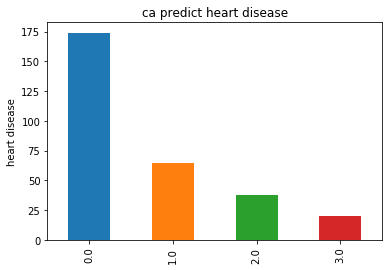

In [44]:
data.ca.value_counts().plot(kind='bar')
plt.title(u"ca predict heart disease") 
plt.ylabel(u"heart disease")

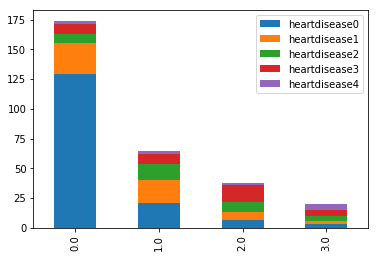

In [50]:
heartdisease_0 = data.ca[data.num == 0].value_counts()
heartdisease_1 = data.ca[data.num == 1].value_counts()
heartdisease_2 = data.ca[data.num == 2].value_counts()
heartdisease_3 = data.ca[data.num == 3].value_counts()
heartdisease_4 = data.ca[data.num == 4].value_counts()
df=pd.DataFrame({u'heartdisease0':heartdisease_0, u'heartdisease1':heartdisease_1, u'heartdisease2':heartdisease_2,u'heartdisease3':heartdisease_3,u'heartdisease4':heartdisease_4})
df.plot(kind='bar', stacked=True)

### 3.3 slop predict heart disease

In [41]:
pd.crosstab(data.loc[:,"num"],data.loc[:,"slope"]).T.cumsum()

num,0.0,1.0,2.0,3.0,4.0
slope,,,,,
1.0,103,22,7,6,1
2.0,151,52,32,30,11
3.0,160,54,35,35,13


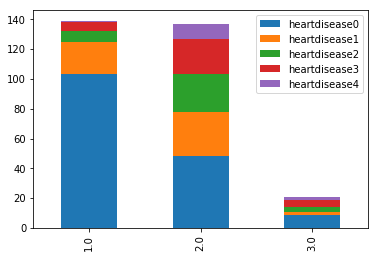

In [51]:
heartdisease_0 = data.slope[data.num == 0].value_counts()
heartdisease_1 = data.slope[data.num == 1].value_counts()
heartdisease_2 = data.slope[data.num == 2].value_counts()
heartdisease_3 = data.slope[data.num == 3].value_counts()
heartdisease_4 = data.slope[data.num == 4].value_counts()
df=pd.DataFrame({u'heartdisease0':heartdisease_0, u'heartdisease1':heartdisease_1, u'heartdisease2':heartdisease_2,u'heartdisease3':heartdisease_3,u'heartdisease4':heartdisease_4})
df.plot(kind='bar', stacked=True)

### 3.3 thal predict heart disease

In [42]:
pd.crosstab(data.loc[:,"num"],data.loc[:,"thal"]).T.cumsum()

num,0.0,1.0,2.0,3.0,4.0
thal,,,,,
3.0,127,22,7,6,2
6.0,133,25,13,7,4
7.0,160,54,35,35,13


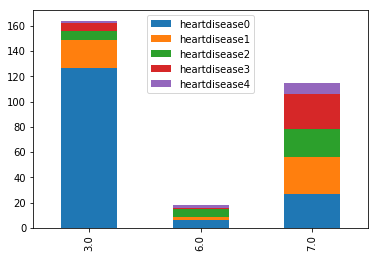

In [52]:
heartdisease_0 = data.thal[data.num == 0].value_counts()
heartdisease_1 = data.thal[data.num == 1].value_counts()
heartdisease_2 = data.thal[data.num == 2].value_counts()
heartdisease_3 = data.thal[data.num == 3].value_counts()
heartdisease_4 = data.thal[data.num == 4].value_counts()
df=pd.DataFrame({u'heartdisease0':heartdisease_0, u'heartdisease1':heartdisease_1, u'heartdisease2':heartdisease_2,u'heartdisease3':heartdisease_3,u'heartdisease4':heartdisease_4})
df.plot(kind='bar', stacked=True)

### 3.4 relevance between age and blood pressure

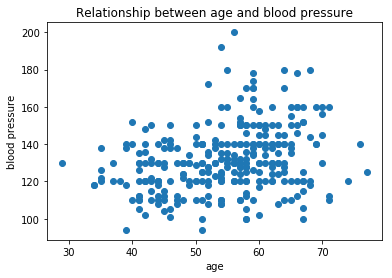

In [98]:
plt.xlabel("age")
plt.ylabel("blood pressure")

# define title
plt.title("Relationship between age and blood pressure")

# plot
plt.scatter(df0['age'], df0['restbp'])
plt.show()

### 3.5 correlation matrix

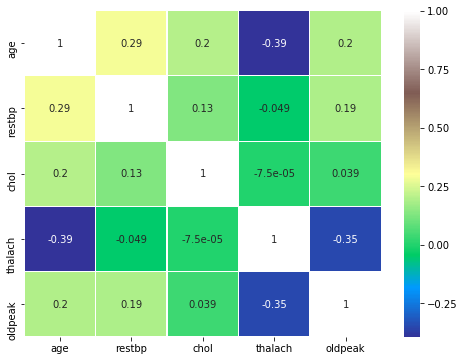

In [6]:
import seaborn as sns
numeric_columns = ['age', 'restbp', 'chol', 'thalach', 'oldpeak']
sns.heatmap(data[numeric_columns].corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

### 3.6 relevance between age and heart disease

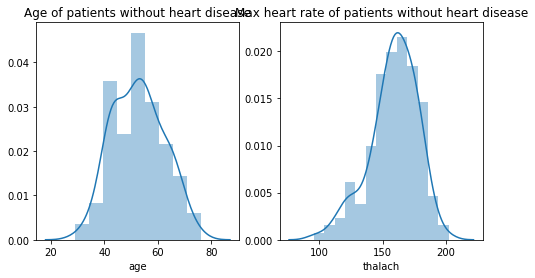

In [14]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(data[data['num']==0].age)
plt.title('Age of patients without heart disease')
plt.subplot(122)
sns.distplot(data[data['num']==0].thalach)
plt.title('Max heart rate of patients without heart disease')

plt.show()